# Exercise 03

## Exercise H3.1: Multilayer Perceptrons (MLP)

### a, b) Creating 50 MLPs and plotting them

**Importing libraries & Defining the classes**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

class Weights:
    """
    Weights generation class, works by constructing
    [
        [
            hidden_to_x0,
            hidden_to_x1,
        ],
        [
            output_to_hidden
        ]
    ]
    where hidden_to_x0, hidden_to_x1 and output_to_hidden are numpy arrays.
    """
    
    def generate_random(self):
        """
        Generates weights as following:
            - Array of weights between hidden layer and input layer:
                - hidden nodes <=> x0 (from -2 to 2 uniformly distributed)
                - hidden nodes <=> x1 (from 0 to 2 normally distributed)
            - Array of weights between output layer and hidden layer:
                - output node <=> hidden nodes (from 0 to 1 normally distributed)
        Note that x0 is the bias

        Returns array(size 2) of arrays containing numpy vectors (each of size 10)
        """
        output_to_hidden = np.random.normal(0, 1, 10)
        hidden_to_x1 = np.random.normal(0, 2, 10)
        hidden_to_x0 = np.random.uniform(-2, 2, 10)
        return [[hidden_to_x0, hidden_to_x1], [output_to_hidden]]
        

class MLP:
    """
    MLP class that takes a confiugration (weights)
    and evaluates the output y(x) based on given x.
    """
    def __init__(self, weights):
        self.weights = weights
        self.size = len(weights[0][0])
    
    def transfer_function(self, h_input):
        """
        Evaluates the h_input

        Returns tanh(h_input)
        """
        return np.tanh(h_input)
    
    def evaluate_output(self, input_data):
        """
        Given input_data x, evaluates the output of the neuron
        using the weights of the MLP.
         - Weights of hidden layer <=> x:      self.weights[0][1]
         - Weights of hidden layer <=> bias:   self.weights[0][0]
         - Weights of output layer <=> hidden: self.weights[1][0]
        
        Returns a scalar output.
        """
        h = np.dot(self.weights[0][1], input_data) - self.weights[0][0]
        output = np.dot(self.weights[1][0], np.tanh(h))
        return output
    
    def evaluate_multiple(self, multiple_inputs):
        """
        Evaluates multiple inputs by running self.evaluate_output() on each input_value
        
        Returns array of scalar outputs
        """
        return [self.evaluate_output(input_value) for input_value in multiple_inputs]

# Testing the network
weights = Weights().generate_random()
MLP(weights).evaluate_output(-2)

1.231364707372218

**Initiating 50 weights sets and plotting data**

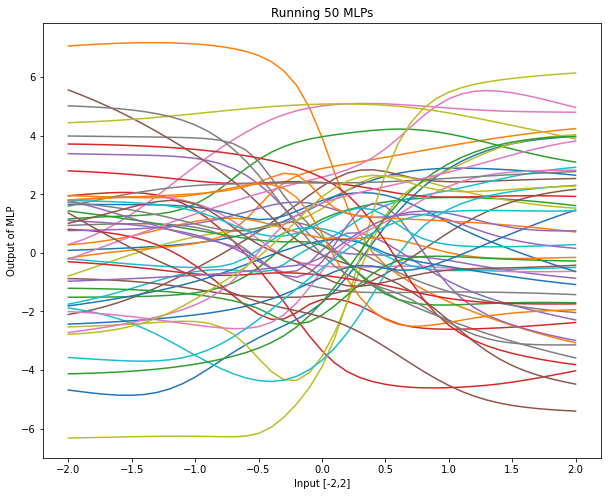

In [101]:
NO_OF_MLPS = 50

def plot_results(inputs, all_results):
    plt.figure(figsize=(10,8))

    for result_set in all_results:
        plt.plot(inputs, result_set)

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Input [-2,2]")
    plt.ylabel("Output of MLP")
    plt.title("Running 50 MLPs")
    # plt.legend()
    plt.show()


inputs = list(np.arange(-2,2.1, 0.1))
fifty_weights = [Weights().generate_random() for _ in range(NO_OF_MLPS)]
all_results = [MLP(weights).evaluate_multiple(inputs) for weights in fifty_weights]

plot_results(inputs, all_results)

### c) Using different initialization scheme

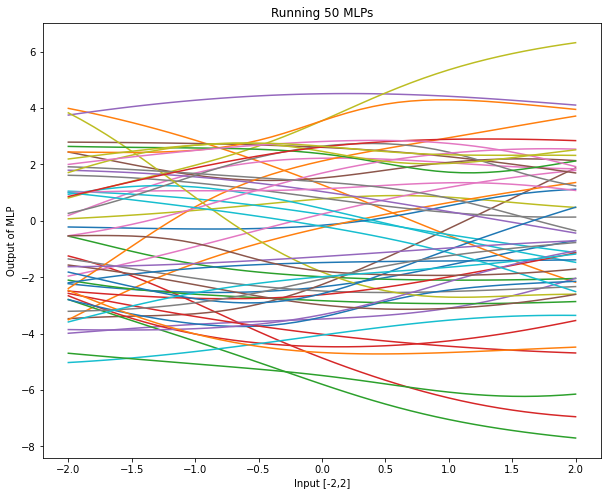

In [102]:
class DifferentWeights(Weights):
    """
    A different Weights class that inherits from base Weights class
    """
    def generate_random(self):
        output_to_hidden = np.random.normal(0, 1, 10)
        hidden_to_x1 = np.random.normal(0, 0.5, 10)
        hidden_to_x0 = np.random.uniform(-2, 2, 10)
        return [[hidden_to_x0, hidden_to_x1], [output_to_hidden]]

fifty_other_weights = [DifferentWeights().generate_random() for _ in range(NO_OF_MLPS)]
all_other_results = [MLP(weights).evaluate_multiple(inputs) for weights in fifty_other_weights]

plot_results(inputs, all_other_results)

### d) Calculating MSE

In [103]:
def mse(A, B):
    return (np.square(np.array(A) - np.array(B))).mean()

def analyse_mlp(desired, results, prefix=""):
    print("========================")
    print("{} MLP".format(prefix))
    mlp_sum = 0
    for idx, result in enumerate(results):
        mse_res = mse(result, g_x)
        mlp_sum += mse_res
        print("  {} - MSE: {}".format(idx, mse_res))
    print("TOTAL MSE: {}".format(mlp_sum))

g_x = [-1 * x for x in inputs]
analyse_mlp(g_x, all_results, prefix="First")
analyse_mlp(g_x, all_other_results, prefix="Second")


First MLP
  0 - MSE: 7.741585362095394
  1 - MSE: 17.347348443212105
  2 - MSE: 6.836793763526949
  3 - MSE: 6.460903948769098
  4 - MSE: 1.8649356419527587
  5 - MSE: 9.345406457091608
  6 - MSE: 21.84345826571419
  7 - MSE: 0.47362515060141647
  8 - MSE: 5.77370005514877
  9 - MSE: 7.84855932522324
  10 - MSE: 21.23497746365474
  11 - MSE: 12.603792393792848
  12 - MSE: 13.710207319317133
  13 - MSE: 6.014320304948309
  14 - MSE: 0.3310795528234816
  15 - MSE: 5.536504653111439
  16 - MSE: 0.3508986039449471
  17 - MSE: 3.6875295775427595
  18 - MSE: 16.346400129600607
  19 - MSE: 1.4622219215059065
  20 - MSE: 2.182223639669619
  21 - MSE: 1.0523176067187507
  22 - MSE: 0.22159100063936907
  23 - MSE: 2.435592966635146
  24 - MSE: 0.8234739842083281
  25 - MSE: 4.276607258161647
  26 - MSE: 17.765934730001682
  27 - MSE: 0.11969096275887847
  28 - MSE: 43.814454372035556
  29 - MSE: 13.60305814105876
  30 - MSE: 2.830651447827694
  31 - MSE: 1.2888998273607655
  32 - MSE: 4.14797995

**Summary**
- First MLP has total MSE of 472.45
- Second MLP has total MSE of 375.5
- Second MLP has less MSE and approximates the function g(x) better

----------------------------------------------------------------
## Exercise H3.2: MLP Regression

### A) Intialization

In [183]:
class LearningMLP:
    """
    MLP class that takes a confiugration (weights)
    and evaluates the output y(x) based on given x.
    """
    def __init__(self, no_of_hidden_nodes):
        hidden_weights = [np.random.uniform(size = 1, low = -0.5, high = 0.5) for y in range(no_of_hidden_nodes)]
        output_weights = np.random.uniform(size = 3, low = -0.5, high = 0.5)
        hidden_biases = np.random.uniform(size = no_of_hidden_nodes, low = -0.5, high = 0.5)
        output_bias = np.random.uniform(size = 1, low = -0.5, high = 0.5)[0]
        self.weights = [hidden_weights, output_weights]
        self.biases = [hidden_biases, output_bias]
    
    def feed_forward(self, activation):
        intermediate_hs = []
        intermediate_activations = []
        for indx, (w, b) in enumerate(zip(self.weights, self.biases)):
            # print("activation: {}".format(activation))
            # print("weights: {}".format(w))
            # print("biases: {}".format(b))
            intermediate_h = np.dot(w,activation) + b
            intermediate_hs.append(intermediate_h)
            if (indx+1) < len(self.weights):
                activation = self.tanh_transfer_function(intermediate_h)
            else:
                activation = intermediate_h
            intermediate_activations.append(activation)
        self.intermediate_hs = intermediate_hs
        self.intermediate_activations = intermediate_activations
        self.current_network_ouptut = activation
        return activation
    
    def tanh_transfer_function(self, h_input):
        """
        Evaluates the h_input for hidden nodes

        Returns tanh(h_input)
        """
        # print("input/h/z: {}".format(h_input))
        return np.tanh(h_input)
    
    def cost_function(self, output_1, output_2):
        return (output_1 - output_2)**2
    
    def local_output_error(self, evaluated_y, y_true):
        """
        Since the transfer function of the output layer is the 
        identity function, so the derivative y(C)/y(hL)
        would be (y_evaluated - y_true)
        """
        return (evaluated_y - y_true)
    
    def local_hidden_error(self, local_output_error):
        """
        δl = ((wl+1)T * δl+1) ⊙ σ′(zl)
        """
        weight_of_next_layers = np.array(self.weights[1]).transpose()
        intermediate = np.dot(weight_of_next_layers, local_output_error)
        derivative_of_transfer = 1 - (np.tanh(self.intermediate_hs[0]) ** 2)
        return np.array(intermediate * derivative_of_transfer)
    
    def run_algo(self, input_x, output_y, iterations=10):
        """
        Given input_data x, evaluates the output of the neuron
        using the weights of the MLP.
         - Weights of hidden layer <=> x:      self.weights[0][1]
         - Weights of hidden layer <=> bias:   self.weights[0][0]
         - Weights of output layer <=> hidden: self.weights[1][0]
        
        Returns a scalar output.
        """
        mses = []
        for i in range(iterations):
            output_errors = []
            delta_weights_outputs = []
            delta_bias_outputs = []
            delta_weights_hiddens = []
            delta_bias_hiddens = []
            for x, y in zip(input_x, output_y):
                initial_activation = np.array([x])
                evaluated_output = self.feed_forward(initial_activation)
                # print("comparison: {} / {}".format(evaluated_output, y))

                output_error = self.cost_function(evaluated_output, y)
                output_errors.append(output_error)

                # Calculate delta weights of output layer
                local_output_error = self.local_output_error(evaluated_output, y)
                delta_weights_output = np.dot(self.intermediate_activations[0], local_output_error)
                delta_bias_output = local_output_error
                delta_weights_outputs.append(delta_weights_output)
                delta_bias_outputs.append(delta_bias_output)
                # print("local_output_error: {}".format(local_output_error))
                # print("hidden layer activations: {}".format(self.intermediate_activations[0]))
                # print("delta_weights_output: {}".format(delta_weights_output))

                # Calculate delta weights of hidden layer
                local_hidden_error = self.local_hidden_error(local_output_error)
                delta_weights_hidden = np.array([x*local_hidden_error]).transpose()
                delta_bias_hidden = local_hidden_error
                delta_weights_hiddens.append(delta_weights_hidden)
                delta_bias_hiddens.append(delta_bias_hidden)

            # Update weights
            average_delta_weights_hidden = np.add.reduce(delta_weights_hiddens) * 1/len(input_x)
            average_delta_bias_hidden = np.add.reduce(delta_bias_hiddens) * 1/len(input_x)
            
            average_delta_weights_output = np.add.reduce(delta_weights_outputs) * 1/len(input_x)
            average_delta_bias_output = np.average(delta_bias_outputs)
            new_weights = [(self.weights[0] - average_delta_weights_hidden), (self.weights[1] - average_delta_weights_output)]
            new_biases = [(self.biases[0] - average_delta_bias_hidden), (self.biases[1] - average_delta_bias_output)]
            self.weights = new_weights
            self.biases = new_biases
            # print("\n\n++++++ New Iteration+++++++++++")
            # print(np.average(output_errors))
            mses.append(np.average(output_errors))
        return mses
    
    def analysis(self, input_x, output_y):
        """
        Returns input_output values and the hidden outputs
        """
        network_outputs = []
        hidden_outputs = []
        for x, y in zip(input_x, output_y):
            initial_activation = np.array([x])
            evaluated_output = self.feed_forward(initial_activation)
            network_outputs.append(self.intermediate_activations[1])
            hidden_outputs.append(self.intermediate_activations[0])
        
        return (hidden_outputs, network_outputs)
        

regression_data = np.genfromtxt('RegressionData.csv', delimiter=',')
X = [regression_datapoint[0] for regression_datapoint in regression_data]
Y = [regression_datapoint[1] for regression_datapoint in regression_data]

mlp = LearningMLP(3)
mses = mlp.run_algo(X,Y, iterations=200)

### a) Plot of cost function over iterations

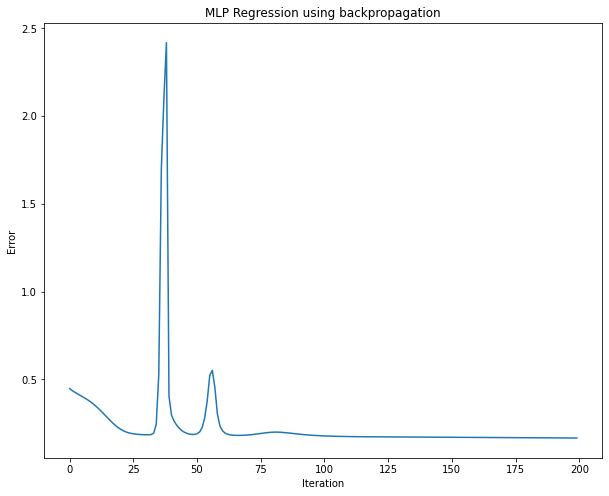

In [184]:
def plot_network_performance(mses):
    plt.figure(figsize=(10,8))

    plt.plot(list(range(len(mses))), mses)

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Iteration")
    plt.ylabel("Error")
    plt.title("MLP Regression using backpropagation")
    # plt.legend()
    plt.show()

plot_network_performance(mses)

### b, c) Plot input-output and hidden outputs

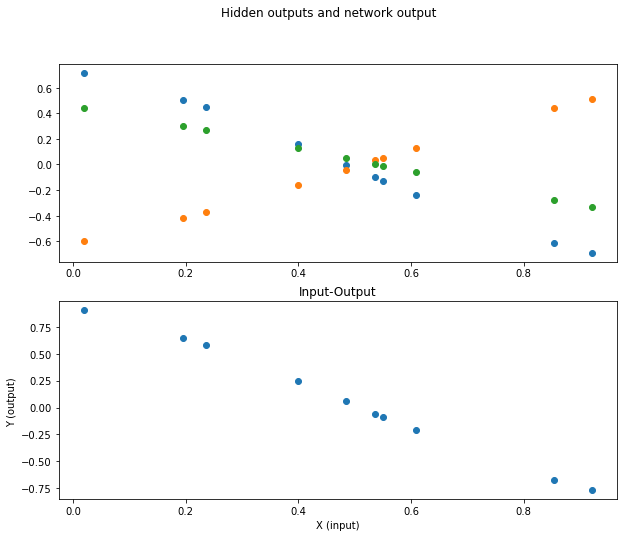

In [192]:
def plot_analysis(X, hidden_outputs, network_output):
    fig, axs = plt.subplots(2, figsize=(10, 8))
    fig.suptitle('Hidden outputs and network output')
    
    # Plot hidden outputs
    axs[0].scatter(X, [hidden_output[0] for hidden_output in hidden_outputs], label = "Hidden neuron 1")
    axs[0].scatter(X, [hidden_output[1] for hidden_output in hidden_outputs], label = "Hidden neuron 2")
    axs[0].scatter(X, [hidden_output[2] for hidden_output in hidden_outputs], label = "Hidden neuron 3")

    # Plot network outputs
    axs[1].scatter(X, network_output, label = "Hidden neuron 3")
    
    plt.xlabel("X (input)")
    plt.ylabel("Y (output) ")
    plt.title("Input-Output")
    plt.show()

analysis_output = mlp.analysis(X,Y)
plot_analysis(X, analysis_output[0], analysis_output[1])

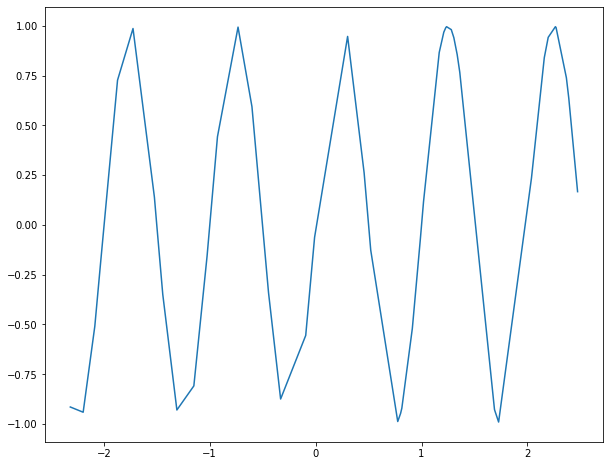

In [196]:
import math


x = np.random.uniform(size = 50, low = -2.5, high = 2.5)
x =  np.sort(x)
y = [np.sin(2*math.pi*x0) for x0 in x]

plt.figure(figsize=(10,8))
plt.plot(x, y)